<a href="https://colab.research.google.com/github/Jayaprakash1710/Module-21-Computer-vision/blob/main/DJ_Lec_3_CNN_under_the_hood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC

Downloading...
From (original): https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC
From (redirected): https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC&confirm=t&uuid=333f4833-2e02-4837-83a2-0342d58f74c3
To: /content/clothing-dataset-small.zip
100% 106M/106M [00:00<00:00, 119MB/s] 


In [2]:
!unzip /content/clothing-dataset-small.zip

Archive:  /content/clothing-dataset-small.zip
   creating: clothing-dataset-small/
  inflating: clothing-dataset-small/.DS_Store  
   creating: clothing-dataset-small/test/
   creating: clothing-dataset-small/test/skirt/
  inflating: clothing-dataset-small/test/skirt/f4b934fc-e326-4f72-b535-53288b8b82d3.jpg  
  inflating: clothing-dataset-small/test/skirt/491982c3-3e90-431e-99e6-b14ecea36384.jpg  
  inflating: clothing-dataset-small/test/skirt/24963db3-649c-4f04-8da3-0375ede8e0a6.jpg  
  inflating: clothing-dataset-small/test/skirt/32b99302-cec7-4dec-adfa-3d4029674209.jpg  
  inflating: clothing-dataset-small/test/skirt/0558b2c5-be00-49de-b27f-8c88114ac36f.jpg  
  inflating: clothing-dataset-small/test/skirt/95e66e02-b4ed-4fe9-b538-db6bac4fb7df.jpg  
  inflating: clothing-dataset-small/test/skirt/2001dec1-1e0a-4c11-9d15-120b019b3dea.jpg  
  inflating: clothing-dataset-small/test/skirt/b0e05193-cc92-4935-88d7-e71a1b19dd4b.jpg  
  inflating: clothing-dataset-small/test/skirt/309829b2-6d1

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

import os
import glob #makes is easy to navigate folders
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.keras.utils.set_random_seed(111)

import warnings
warnings.filterwarnings("ignore")


In [31]:
def load_data(base_dir="clothing-dataset-small"):
    # checking if the data folders are present
    assert os.path.exists(f"{base_dir}/train") and os.path.exists(f"{base_dir}/validation") and os.path.exists(f"{base_dir}/test")

    print('\nLoading Data...')
    train_data = tf.keras.utils.image_dataset_from_directory(
        f"{base_dir}/train", shuffle=True, label_mode='categorical'
    )
    val_data = tf.keras.utils.image_dataset_from_directory(
        f"{base_dir}/validation", shuffle=False, label_mode='categorical'
    )
    test_data = tf.keras.utils.image_dataset_from_directory(
        f"{base_dir}/test", shuffle=False, label_mode='categorical'
    )
    return train_data, val_data, test_data, train_data.class_names

In [32]:
train_data, val_data, test_data, class_names = load_data()


Loading Data...
Found 3068 files belonging to 10 classes.
Found 341 files belonging to 10 classes.
Found 372 files belonging to 10 classes.


In [33]:
def preprocess(train_data, val_data, test_data, target_height=128, target_width=128):

    # Data Processing Stage with resizing and rescaling operations
    data_preprocess = keras.Sequential(
        name="data_preprocess",
        layers=[
            layers.Resizing(target_height, target_width),
            layers.Rescaling(1.0/255),
        ]
    )

    # Perform Data Processing on the train, val, test dataset
    train_ds = train_data.map(lambda x, y: (data_preprocess(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    val_ds = val_data.map(lambda x, y: (data_preprocess(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    test_ds = test_data.map(lambda x, y: (data_preprocess(x), y), num_parallel_calls=tf.data.AUTOTUNE)

    return train_ds, val_ds, test_ds

In [34]:
train_ds, val_ds, test_ds = preprocess(train_data, val_data, test_data)

In [35]:
def baseline(height=128, width=128):
    num_classes = 10
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", activation='relu', input_shape=(height, width, 3)),
            layers.MaxPooling2D(),
            layers.Flatten(),
            layers.Dense(units=hidden_size, activation='relu'),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [36]:
model = baseline()
model.summary()

Model: "model_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,780,490 (64.01 MB)

 Trainable params: 16,780,490 (64.01 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
def compile_train_v1(model, train_ds, val_ds, ckpt_path="/tmp/checkpoint.weights.h5"):
    epochs = 10
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[
        keras.callbacks.ModelCheckpoint(ckpt_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
    ])
    return model_fit

In [40]:
model_fit = compile_train_v1(model, train_ds, val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.2411 - loss: 6.0413 - val_accuracy: 0.3871 - val_loss: 1.9015
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.4679 - loss: 1.6818 - val_accuracy: 0.5044 - val_loss: 1.5733
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.6037 - loss: 1.2185 - val_accuracy: 0.5660 - val_loss: 1.4680
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.7592 - loss: 0.8051 - val_accuracy: 0.5601 - val_loss: 1.4893
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.8662 - loss: 0.4755 - val_accuracy: 0.5953 - val_loss: 1.4757
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9457 - loss: 0.2544 - val_accuracy: 0.5777 - val_loss: 1.6590
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.9788 - loss: 0.1366 - val_accuracy: 0.5982 - val_loss: 1.7032
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.9891 - loss: 0.0769 - val_accuracy: 0.5777

In [41]:
# helper function to annotate maximum values in the plots
def annot_max(x,y, xytext=(0.94,0.96), ax=None, only_y=True):
    xmax = x[np.argmax(y)]
    ymax = max(y)
    if only_y:
        text = "{:.2f}%".format(ymax)
    else:
        text= "x={:.2f}, y={:.2f}%".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=xytext, **kw)

def plot_accuracy(model_fit):
    #accuracy graph
    x = range(0,len(model_fit.history['accuracy']))
    y_train = [acc * 100 for acc in model_fit.history['accuracy']]
    y_val = [acc * 100 for acc in model_fit.history['val_accuracy']]

    plt.plot(x, y_train, label='Train', color='b')
    annot_max(x, y_train, xytext=(0.7,0.9))
    plt.plot(x, y_val, label='Val', color='r')
    annot_max(x, y_val, xytext=(0.8,0.7))
    plt.ylabel('Accuracy', fontsize=15)
    plt.xlabel('epoch', fontsize=15)
    plt.legend()
    plt.show()

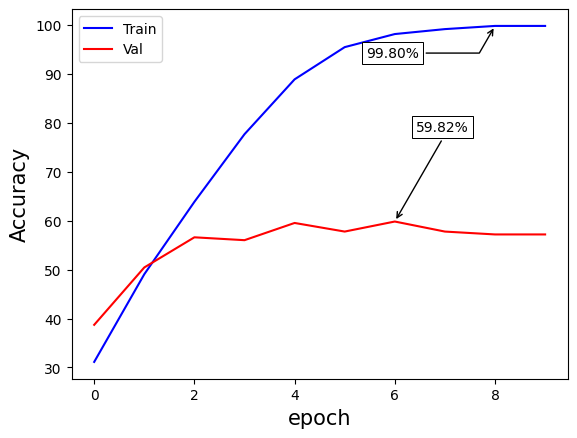

In [42]:
plot_accuracy(model_fit)

In [44]:
def print_accuracy_stats(model, ds, class_names):
    model.load_weights("/tmp/checkpoint.weights.h5")
    true_onehot = tf.concat([y for x, y in ds], axis=0)
    true_categories = tf.argmax(true_onehot, axis=1)
    y_pred = model.predict(ds)
    predicted_categories = tf.argmax(y_pred, axis=1)

    test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
    print(f'\nTest Accuracy: {test_acc:.2f}%\n')

# Note: This doesn't work with shuffled datasets
def plot_confusion_matrix(model, ds, class_names):
    model.load_weights("/tmp/checkpoint.weights.h5")
    true_onehot = tf.concat([y for x, y in ds], axis=0)
    true_categories = tf.argmax(true_onehot, axis=1)
    y_pred = model.predict(ds)
    predicted_categories = tf.argmax(y_pred, axis=1)
    cm = metrics.confusion_matrix(true_categories,predicted_categories) # last batch
    sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names, cmap="YlGnBu", fmt='g')
    plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step

Test Accuracy: 54.03%

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


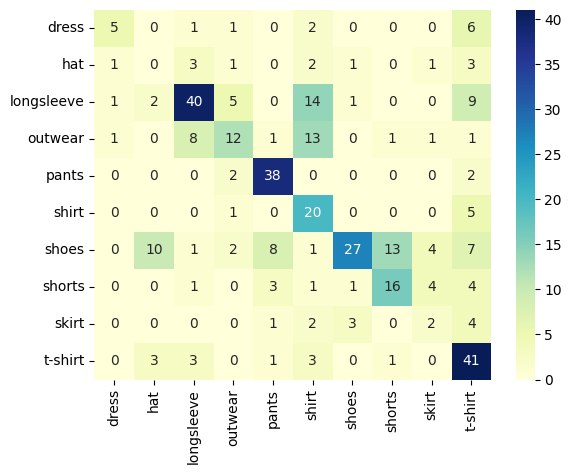

In [45]:
print_accuracy_stats(model, test_ds, class_names)
plot_confusion_matrix(model, test_ds, class_names)

Architecture:

In [46]:
def arch_1(height=128, width=128):
    num_classes = 10
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn_1",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", activation='relu', input_shape=(height, width, 3)),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=32, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'),
            # layers.MaxPooling2D(),
            # layers.Flatten(),
            layers.GlobalAveragePooling2D(),
            layers.Dense(units=hidden_size, activation='relu'),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [47]:
model = arch_1()
model.summary()

Model: "model_cnn_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 460,970 (1.76 MB)

 Trainable params: 460,970 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
def compile_train_v1(model, train_ds, val_ds, epochs=10, ckpt_path="/tmp/checkpoint.weights.h5"):
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[
        keras.callbacks.ModelCheckpoint(ckpt_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
    ])
    return model_fit

In [51]:
model_fit = compile_train_v1(model, train_ds, val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - accuracy: 0.2253 - loss: 2.1695 - val_accuracy: 0.2375 - val_loss: 2.1584
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.2825 - loss: 2.1045 - val_accuracy: 0.2874 - val_loss: 2.0847
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.3489 - loss: 1.9369 - val_accuracy: 0.3812 - val_loss: 1.8248
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.4059 - loss: 1.7444 - val_accuracy: 0.3842 - val_loss: 1.7421
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.4363 - loss: 1.6438 - val_accuracy: 0.4692 - val_loss: 1.6324
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.4846 - loss: 1.4917 - val_accuracy: 0.4370 - val_loss: 1.7021
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.5335 - loss: 1.3668 - val_accuracy: 0.5249 - val_loss: 1.5257
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.5701 - loss: 1.2478 - val_accuracy: 0.5220

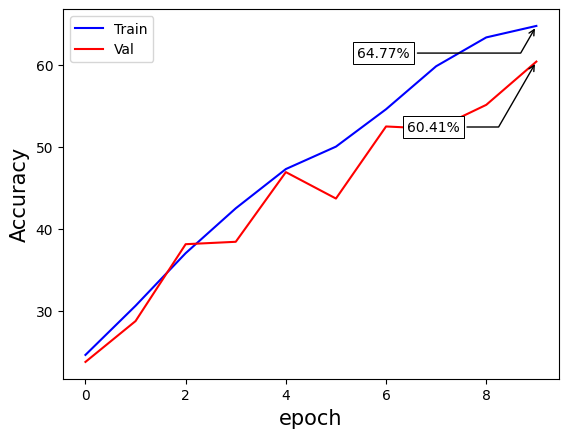

In [52]:
plot_accuracy(model_fit)

In [53]:
model_fit = compile_train_v1(model, train_ds, val_ds, epochs=30)

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.6789 - loss: 0.9419 - val_accuracy: 0.6188 - val_loss: 1.1023
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.7173 - loss: 0.8299 - val_accuracy: 0.6334 - val_loss: 1.1006
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.7491 - loss: 0.7590 - val_accuracy: 0.6598 - val_loss: 1.0285
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.7563 - loss: 0.7137 - val_accuracy: 0.6305 - val_loss: 1.0943
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.7678 - loss: 0.6769 - val_accuracy: 0.6334 - val_loss: 0.9824
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.7880 - loss: 0.5899 - val_accuracy: 0.6540 - val_loss: 1.0848
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.8188 - loss: 0.5295 - val_accuracy: 0.6657 - val_loss: 1.0396
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.8465 - loss: 0.4588 - val_accuracy: 0.692

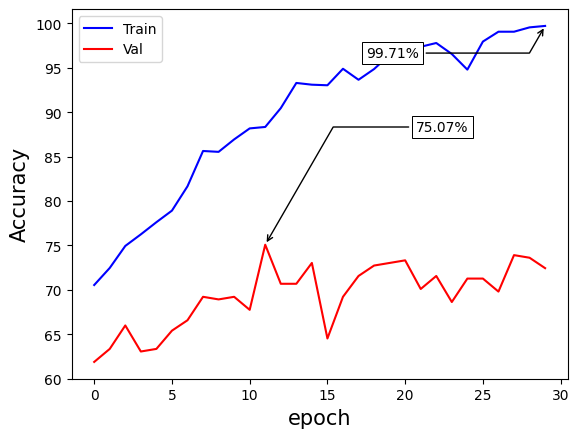

In [54]:
plot_accuracy(model_fit)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step

Test Accuracy: 70.43%

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


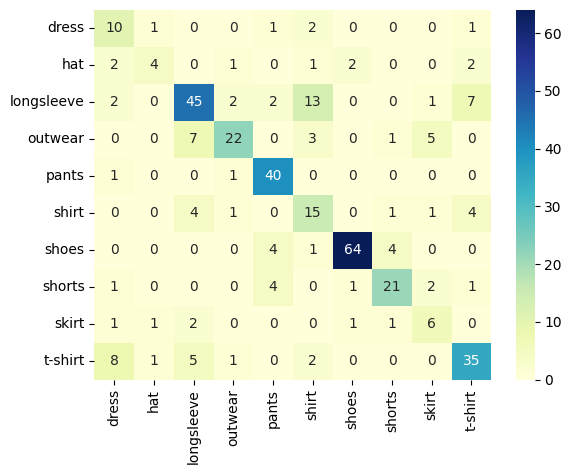

In [55]:
print_accuracy_stats(model, test_ds, class_names)
plot_confusion_matrix(model, test_ds, class_names)